#### Importar bibliotecas

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregando arquivos de vendas

In [4]:
# PASTA QUE CONTÉM TODOS OS ARQUIVOS
caminhoDaPasta = './arquivos/vendas/'
# AGRUPAR TODOS OS DOCUMENTOS EM UM ÚNICO DATAFRAME
diretorios = []
#os.listdir(caminhoDaPasta)
for file in os.listdir(caminhoDaPasta):
    fullPath = caminhoDaPasta + file
    diretorios.append(fullPath)


#### CRIANDO DATAFRAME

In [5]:
# CRIAR UM DATAFRAME VAZIO
dfvendas = pd.DataFrame()

# LOOP PARA ABRIR E AGRUPOR OS DOCUMENTOS E COMBINÁ-LOS (+/- UNION DO SQL)
for path in diretorios:
    df = pd.read_excel(path)
    dfvendas = pd.concat([dfvendas,df])

# GERAR UM ARQUIVO CSV COM OS DADOS CONSOLIDADOS
dfvendas.to_csv(caminhoDaPasta + 'arquivoCombinado.csv')


#### CARREGAR OS DEMAIS DATAFRAMES

In [6]:
dfMetas = pd.read_excel('./arquivos/base-meta-new.xlsx')
dfVendedores = pd.read_excel('./arquivos/Dimensões.xlsx', sheet_name='Vendedor')
dfProdutos = pd.read_excel('./arquivos/Dimensões.xlsx', sheet_name='Produto')
dfDatas = pd.read_excel('./arquivos/Dimensões.xlsx', sheet_name='Data')
dfGrupoProduto = pd.read_excel('./arquivos/Dimensões.xlsx', sheet_name='GrupoProduto')
dfCliente = pd.read_excel('./arquivos/Dimensões.xlsx' , sheet_name='Cliente')

################### TRATAMENTO DO DATAFREME ###################

# FATIAMENTO DO DATAFREME
dfMetas = dfMetas.iloc[3:,1:4]

# RENOMEANDO COLUNAS
dfMetas.columns = ['cdVendedor','data','meta']

#### TRATAMENTO DO ARQUIVO VENDEDOR

In [7]:
# VISUALIZANDO O CABEÇALHO
dfVendedores.head()

,cdVendedor,Vendedor,cdSupervisor,Supervisor,cdGerente,Gerente,Equipe
0,669,Kaua Araujo,15,Fernando Silva,1,Victor Castro,Varejo
1,660,Julieta Gomes,25,Emily Rocha,1,Victor Castro,Varejo
2,183,Isabella Sousa,25,Emily Rocha,1,Victor Castro,Varejo
3,102,Gustavo Barros,25,Emily Rocha,1,Victor Castro,Varejo
4,196,Leonardo Cardoso,30,Diego Araujo,1,Victor Castro,Varejo


In [8]:
# VISUALIZANDO O FINAL DO CABEÇALHO
dfVendedores.tail()

,cdVendedor,Vendedor,cdSupervisor,Supervisor,cdGerente,Gerente,Equipe
7,265,Julio Lima,35,Diogo Carvalho,2,Gabriel Azevedo,Distribuidoras
8,194,Estevan Souza,35,Diogo Carvalho,2,Gabriel Azevedo,Distribuidoras
9,144,Felipe Goncalves,55,Sofia Ribeiro,2,Gabriel Azevedo,Online
10,285,Mateus Costa,55,Sofia Ribeiro,2,Gabriel Azevedo,Online
11,326,Julia Silva,55,Sofia Ribeiro,2,Gabriel Azevedo,Online


In [9]:
# VERIFICANDO OS TIPOS DE DADOS
dfVendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cdVendedor    12 non-null     int64 
 1   Vendedor      12 non-null     object
 2   cdSupervisor  12 non-null     int64 
 3   Supervisor    12 non-null     object
 4   cdGerente     12 non-null     int64 
 5   Gerente       12 non-null     object
 6   Equipe        12 non-null     object
dtypes: int64(3), object(4)
memory usage: 800.0+ bytes


In [10]:
# OBTENDO ALGUMAS ESTATÍSTICAS BÁSICAS
dfVendedores.describe()

,cdVendedor,cdSupervisor,cdGerente
count,12.000000,12.00000,12.000000
mean,280.333333,35.00000,1.500000
std,190.782281,13.31438,0.522233
min,102.000000,15.00000,1.000000
25%,173.250000,25.00000,1.000000
50%,205.500000,32.50000,1.500000
75%,295.250000,40.00000,2.000000
max,669.000000,55.00000,2.000000


- DAR CONTINUIDADE NA ANÁLISE EXPLORATÓRIA DOS OUTROS  *******

#### Análise Exploratória

In [11]:
# MESCLANDO AS TABELAS VENDAS E DATAS COM O pd.merge

df_result = pd.merge(
                        dfvendas[['DataEmissao','QtdItens','ValorUnitario']],
                        dfDatas[['Data','Ano']],
                        left_on='DataEmissao',
                        right_on='Data'
                    )

# ADICIONAR A COLUNA SUBTOTAL AO DATAFRAME
df_result['subtotal'] = df_result['QtdItens'] * df_result['ValorUnitario']

# AGRUPAR OS DADOS POR ANO
df_result[['Ano','subtotal']].groupby('Ano').sum()

,subtotal
Ano,
2017,6648222.05
2018,10214809.43
2019,1046201.01


- Crie um gráfico de linhas para exibir o comportamento das vendas ao 
longo do ano de 2021.

In [23]:
vendas = './arquivos/vendas/arquivoCombinado.csv'

dados = pd.read_csv(vendas)

dados

,Unnamed: 0,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido
0,0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60
1,1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40
2,2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92
3,3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26
4,4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40
...,...,...,...,...,...,...,...,...,...,...
302835,14243,2022-03-12,2022-04-14,2173547,673190,265,202,24,1.62,1.50
302836,14244,2022-03-12,2022-04-14,2173547,673190,265,1154,12,3.25,1.75
302837,14245,2022-03-12,2022-04-14,2173547,673190,265,668,12,3.26,1.00
302838,14246,2022-03-12,2022-04-14,2173547,673190,265,1527,12,3.14,1.00


Text(0, 0.5, 'Vendas ao Longo do Período')

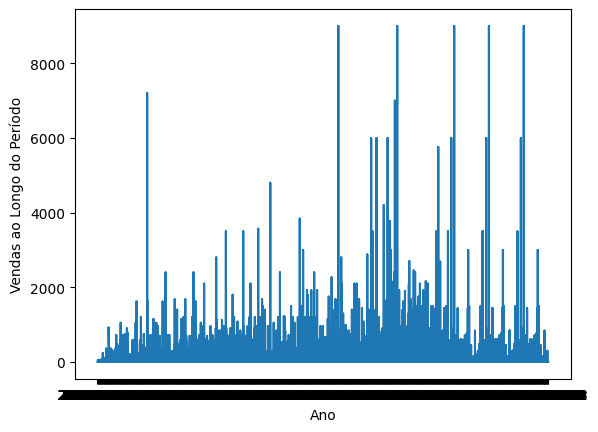

In [24]:
dataEmissao = dados['DataEmissao'].to_list()
qtdItens = dados['QtdItens'].to_list()

plt.plot(dataEmissao, qtdItens)

plt.xlabel('Ano', fontsize = 10)
plt.ylabel('Vendas ao Longo do Período', fontsize = 10)